In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

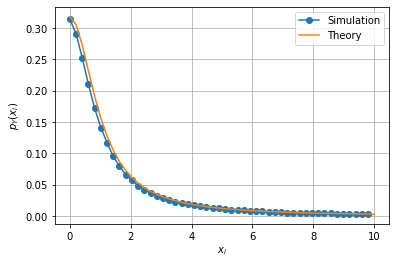

In [18]:
maxrange=50
maxlim=10
x = np.linspace(0,maxlim,maxrange)
simlen = int(1e6)
err = [] 
pdf = []

randvar = np.random.standard_cauchy(simlen)

for i in range(0,maxrange):
    err_ind = np.nonzero((1-randvar)/(1+randvar) < x[i]) #checking probability condition
    err_n = np.size(err_ind) #computing the probability
    err.append(err_n/simlen) #storing the probability values in a list

for i in range(0,maxrange-1):
    test = (err[i+1]-err[i])/(x[i+1]-x[i])
    pdf.append(test) #storing the pdf values in a list
    
def chi_cdf(x):
    return 1/2+(1/np.pi)*np.arctan(x) 

def chi_pdf(x):
    return (1/np.pi)*(1/(1+x**2))

vec_chi_pdf = scipy.vectorize(chi_pdf)
vec_chi_cdf = scipy.vectorize(chi_cdf)

plt.plot(x.T[0:(maxrange-1)],pdf,marker='o')
plt.plot(x,vec_chi_pdf(x))
plt.grid()
plt.xlabel('$x_i$')
plt.ylabel('$p_Y(x_i)$')
plt.legend(["Simulation","Theory"])

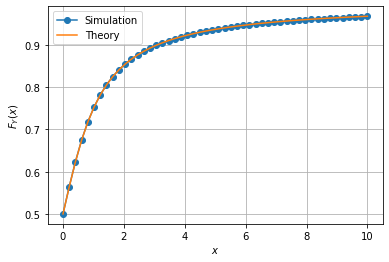

In [21]:
plt.plot(x.T,err,marker='o')#plotting the CDF
plt.plot(x,vec_chi_cdf(x))
plt.grid() #creating the grid
plt.xlabel('$x$')
plt.ylabel('$F_Y(x)$')
plt.legend(["Simulation","Theory"])